In [1]:
# Data source: https://www.dukascopy.com/swiss/english/marketwatch/historical/
import numpy as np
import pandas as pd
%matplotlib inline


Bad key savefig.frameon in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\jeffr\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [2]:
from pathlib import Path
csvpath = Path('../Resources/USD_per_Euro_Hourly_Mid_Prices.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Gmt time')
df.head(2)

,Rate
Gmt time,
2014-01-01 00:00:00,1.37439
2014-01-01 01:00:00,1.37439


<AxesSubplot:xlabel='Gmt time'>

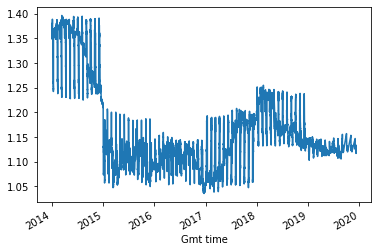

In [3]:
# Hourly EUR to USD exchange rates
df.Rate.plot()

In [8]:
# Hourly percentage changes in exchange rate (resampled to daily)
df['Return'] = df.Rate.pct_change() * 100 * 24
df = df.resample('D').mean()
df = df.dropna()
df.tail()

,Rate,Return
Gmt time,,
2019-12-04,1.129905,5.180175
2019-12-05,1.123457,-13.696727
2019-12-06,1.131525,17.236535
2019-12-07,1.126353,-10.969707
2019-12-08,1.120580,-12.302534


<AxesSubplot:xlabel='Gmt time'>

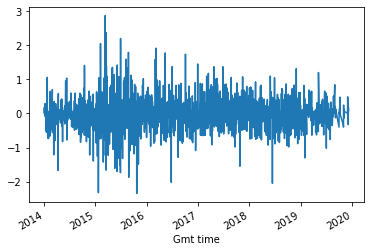

In [5]:
df.Return.plot()

In [ ]:
returns = df

In [9]:
returns = df.loc['2018':'2019'].Rate.pct_change() * 100
returns = returns.dropna()
returns.tail()

Gmt time
2019-12-04    0.215841
2019-12-05   -0.570697
2019-12-06    0.718189
2019-12-07   -0.457071
2019-12-08   -0.512606
Name: Rate, dtype: float64

# GARCH

In [6]:
from arch import arch_model

In [10]:
# Create the GARCH model
# YOUR CODE HERE!
model = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=2)

In [11]:
# Output the model summary
# YOUR CODE HERE!
res = model.fit(disp="off")

In [12]:
# Plot the model estimate of the annualized volatility
# YOUR CODE HERE!
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.002
Vol Model:                      GARCH   Log-Likelihood:               -934.735
Distribution:                  Normal   AIC:                           1879.47
Method:            Maximum Likelihood   BIC:                           1901.45
                                        No. Observations:                  600
Date:                Tue, Nov 30 2021   Df Residuals:                      600
Time:                        21:18:44   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.7685e-03  3.885e-03      1.485      0.138 [-1.846e-03,1.338e-02]
alpha[1]   1.6424e-06  3.959e-03  4.148e-04      1.000 [-7.758e-03,7.762e-03]
alpha[2]   1.2709e-07  3.958e-03  3.211e-05      1.000 [-7.758e-03,7.759e-03]
beta[1]    3.1481e-06  5.631e-03  5.591e-04      1.000 [-1.103e-02,1.104e-02]
beta[2]        0.9880  7.530e-03    131.216      0.000      [  0.973,  1.003]
=============================================================================

Covariance estimator: robust
"""

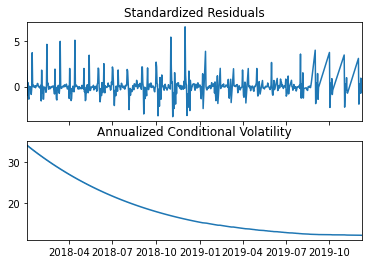

In [13]:
fig = res.plot(annualize='D')

# Forecasting from GARCH

In [14]:
# Find the last day of the dataset
last_day = df.index.max().strftime('%Y-%m-%d')
last_day

'2019-12-08'

In [18]:
# Create a 5 day forecast of EUR to USD exchange rate volatility
# YOUR CODE HERE!
forecast_horizon = 5
forecasts = res.forecast(start=last_day, horizon=forecast_horizon, reindex=True)
forecasts
# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
# YOUR CODE HERE!

In [19]:
# Annualize the forecast
# YOUR CODE HERE!
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate

,h.1,h.2,h.3,h.4,h.5
Gmt time,,,,,
2019-12-08,12.204928,12.20511,12.191253,12.191433,12.177727


# Visualizing the forecast

In [20]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Gmt time,2019-12-08
h.1,12.204928
h.2,12.205110
h.3,12.191253
h.4,12.191433
h.5,12.177727


<AxesSubplot:>

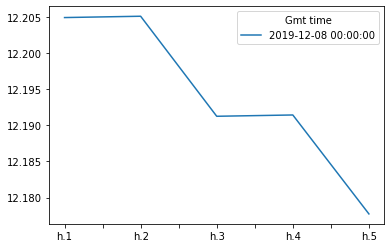

In [22]:
# Plot the final forecast
# YOUR CODE HERE!
final.plot()

Question: Is the exchange rate risk expected to increase or decrease over the next 5 days?

Answer: # YOUR ANSWER HERE!